<a href="https://colab.research.google.com/github/MirandaCR/TEC/blob/main/Avance_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos desde la ruta especificada
file_path = '/content/Dataset.xlsx'
df = pd.read_excel(file_path)


In [3]:
# Codificar la variable objetivo 'SELECCIONADO'
label_encoder = LabelEncoder()
df['SELECCIONADO'] = label_encoder.fit_transform(df['SELECCIONADO'])

In [4]:
# Preparar el conjunto de características y la variable objetivo
X = df.drop(columns=['SELECCIONADO'])
y = df['SELECCIONADO']

In [5]:
# Convertir las columnas categóricas a variables numéricas mediante One-Hot Encoding
X = pd.get_dummies(X)

In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Inicializar los modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True)
}


In [8]:
# Entrenar y evaluar los modelos
model_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

In [9]:
# Convertir los resultados a un DataFrame para mejor visualización
model_results_df = pd.DataFrame(model_results).T

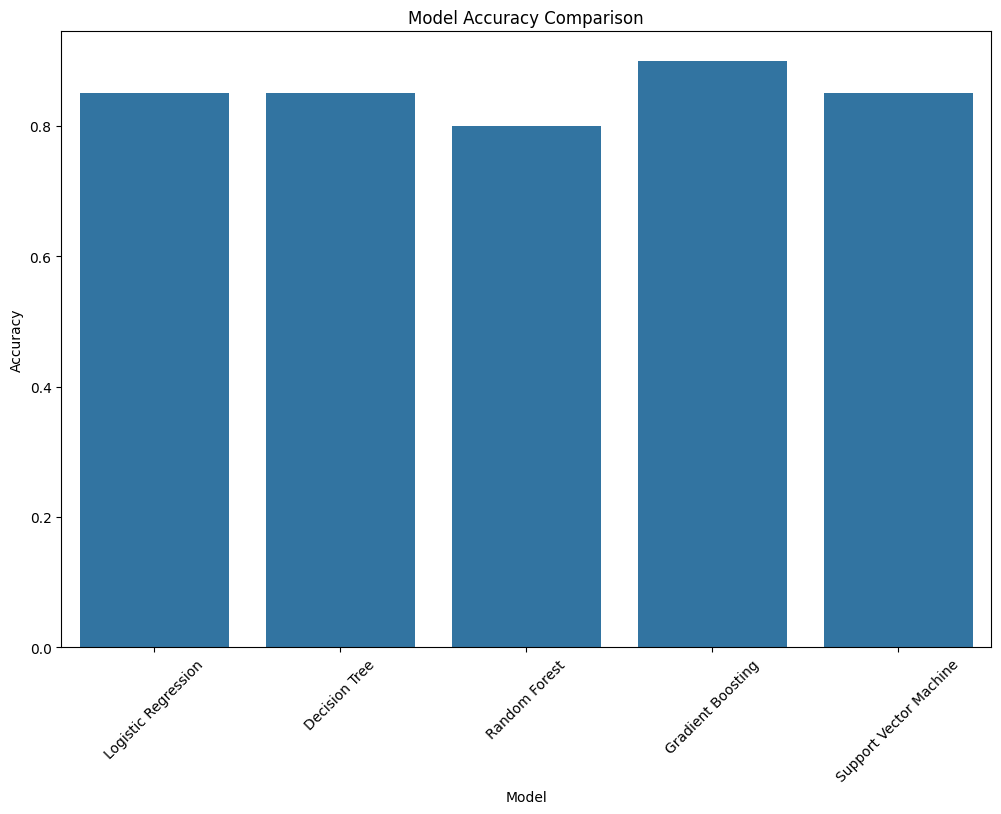

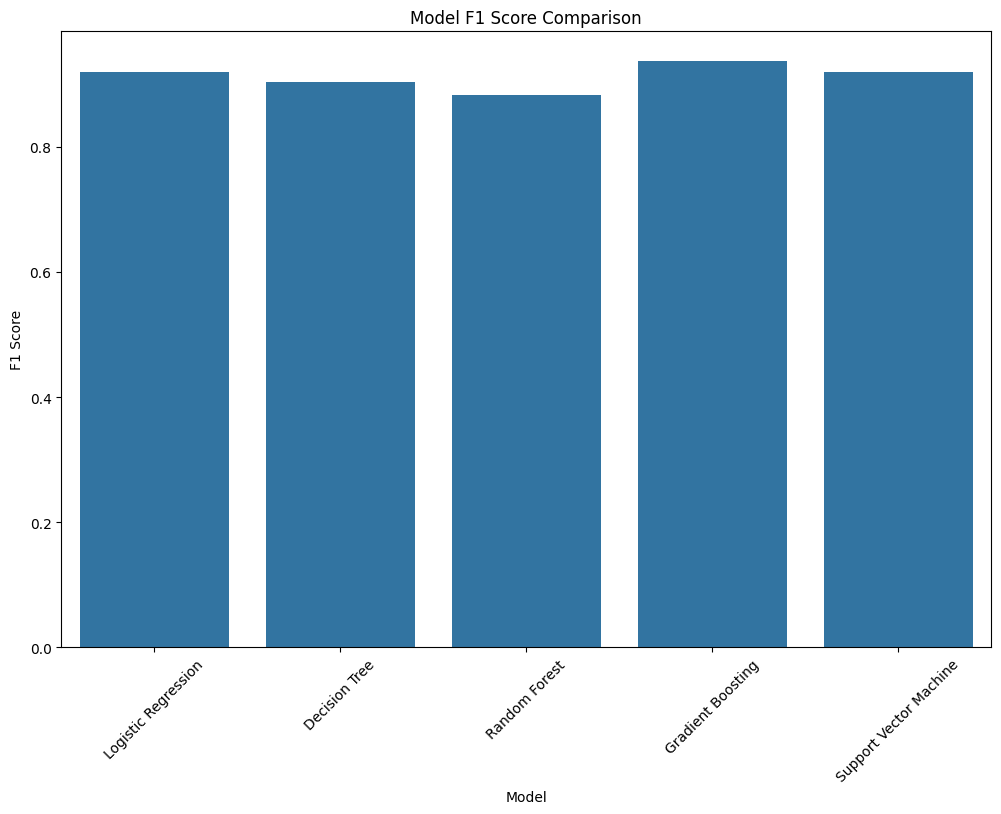

                        Accuracy  Precision    Recall  F1 Score
Logistic Regression         0.85   0.850000  1.000000  0.918919
Decision Tree               0.85   1.000000  0.823529  0.903226
Random Forest               0.80   0.882353  0.882353  0.882353
Gradient Boosting           0.90   1.000000  0.882353  0.937500
Support Vector Machine      0.85   0.850000  1.000000  0.918919


In [10]:
# Visualizar los resultados
plt.figure(figsize=(12, 8))
sns.barplot(x=model_results_df.index, y='Accuracy', data=model_results_df)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x=model_results_df.index, y='F1 Score', data=model_results_df)
plt.title('Model F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()

# Mostrar el DataFrame con los resultados
print(model_results_df)

**Conclusiones de los Resultados:**

* **Gradient Boosting** tiene el mejor rendimiento general con una precisión de 0.90 y una puntuación F1 de 0.9375, lo que sugiere que este modelo captura bien los patrones en los datos.
* **Logistic Regression** y **Support Vector Machine** también tienen un buen rendimiento con puntuaciones F1 de 0.918919, lo que indica que son modelos robustos.
* **Random Forest** tiene el rendimiento más bajo con una precisión de 0.80 y una puntuación F1 de 0.882353, lo que podría deberse a la necesidad de un ajuste de hiperparámetros más detallado o una mayor profundidad del modelo.